## Xử lí ảnh

Xử lí ảnh là phương pháp chuyển đổi ảnh về dạng số hóa có thể xử lí và thực hiện một số thao tác. Đối tượng chính của xử lí ảnh là các bức ảnh được tự nhiên, ảnh chụp. 

Để bắt đầu với việc làm quen với xử lí ảnh, chúng ta sẽ sử dụng thư viện OpenCV nhằm xử lí ảnh. Các bạn có thể tham khảo các thư viện khác như pillow, scikit-image, scipy ...Trong các bài liên quan đến xử lí ảnh, sẽ có các thư viện khác dưới dạng bổ trợ như numpy và matplotlib.

### Import libraries

In [39]:
import cv2
import numpy
import matplotlib.pyplot as plt

In [8]:
# Thực hiện đọc ảnh 
img = cv2.imread('images/btl.jpg')

Với việc sử dụng **jupyter notebook** nên việc hiển thị ảnh bằng OpenCV là không thể nên sẽ sử dụng matplotlib để thay thế. Tuy vậy hiển thị ảnh với OpenCV có một số lưu ý sau:
* Sử dụng hàm cv2.imshow() cho việc hiển thị ảnh.
* Sử dụng hàm cv2.waitKey(delay), delay là thời gian hiển thị ảnh (ms), nếu delay bằng 0 thì ảnh sẽ hiển thị cho đến khi tắt bằng cách nhấn 1 phím bất kì.

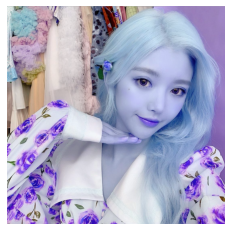

In [14]:
plt.axis('off')
plt.imshow(img)

Do ảnh khi OpenCV đọc vào sẽ được định dạng theo hệ màu GBR nên cần chuyển về RGB để xem

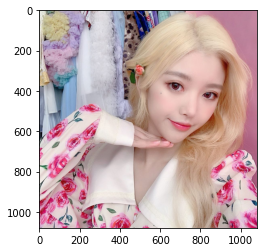

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [18]:
# Shape của ảnh 
img.shape

(1080, 1080, 3)

Ảnh thông thường khi chúng ta đọc thường là ảnh 24 bits, tương ứng với ảnh 16 triệu màu chúng ta hay nghe. Hệ màu sẽ gồm 3 kênh là R (Red), G (Green), B (Blue), những ảnh có định dạng là đuổi .jpg, .jpeg sẽ là ảnh 3 chiều. Một số ảnh có định dạng đuôi là .png là ảnh 4 kênh, ngoài 3 kênh RGB thì kênh thứ 4 là kênh mask. Chúng ta sẽ th ảo luận kênh này kĩ hơn ở lần sau. 

OpenCV cung cấp nhiều cách đọc ảnh, cùng tìm hiểu một số  cách đọc thông dụng 
Hàm đọc ảnh là: ```cv2.imread(path, flag)```

In [20]:
'''
flag mặc định là cv2.IMREAD_COLOR, có thể là 1, là đọc ảnh màu, bất cứ ảnh bao 
nhiêu kênh cũng thành ảnh 3 kênh hết
'''
img = cv2.imread('images/btl.jpg')
img.shape


(1080, 1080, 3)

(1080, 1080)


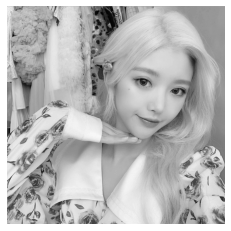

In [25]:
'''
flag = cv2.IMREAD_GRAYSCALE, 0 cũng được, đọc ảnh là ảnh xám, ảnh 1 kênh, hay ko có kênh cũng được
'''
img = cv2.imread('images/btl.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.axis('off')
plt.imshow(img, cmap="gray")

(500, 500, 4)


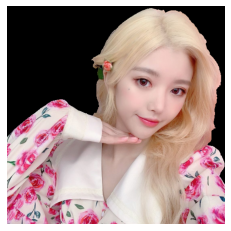

In [29]:
'''
flag = cv2.IMREAD_UNCHANGED, -1 cũng được, đọc ảnh giữ nguyên shape ảnh, chúng ta thử với ảnh png 4 kênh
'''
img = cv2.imread('images/btl.png', cv2.IMREAD_UNCHANGED)
print(img.shape)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img1)

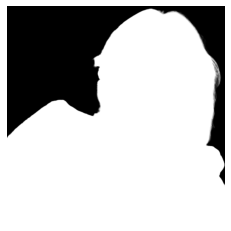

In [40]:
# Chúng ta có thể thử hiển thị kênh thứ 4 của ảnh
plt.axis('off')
plt.imshow(img[:, :, 3], cmap="gray")

Thay đổi kích thước ảnh (resize image) là một công việc rất thông dụng khi xử lí ảnh, những bức ảnh quá lớn để xử lí sẽ mất rất nhiều chi phí tính toán, nhằm để tối ưu hơn hiệu suất, ta thực hiện thay đổi kích thước thích hợp nhỏ hơn. Lưu ý, thay đổi vừa đủ, không nên thay đổi tăng kích thước, làm vậy ảnh sẽ bể, mất độ chi tiết. 

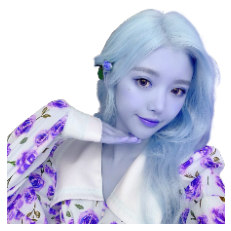

In [43]:
img_resize = cv2.resize(img, (224, 224))
img_resize.shape
plt.axis('off')
plt.imshow(img_resize)

Lưu ảnh, sử dụng hàm ```cv2.imwrite()```

In [45]:
cv2.imwrite('img_save/btl_resize.png', img_resize)

True

In [49]:
# Kiểm tra xe ảnh lưu thành công chưa
%cd img_save/
! ls

/home/thangmd/Thangmd/Learn/SGROUP/image processing/img_save
btl_resize.png
